,Residue_Number,Residue_Name,Window,Hydropathy_Cutoff,Minimum_Blob_Length,blob_length,Normalized_Mean_Blob_Hydropathy,Min_Blob_Hydropathy,Blob_Type,Blob_Index_Number,Blob_Das-Pappu_Class,Blob_NCPR,Fraction_of_Positively_Charged_Residues,Fraction_of_Negatively_Charged_Residues,Fraction_of_Charged_Residues,Uversky_Diagram_Score,dSNP_enrichment,Blob_Disorder,Normalized_Kyte-Doolittle_hydropathy,Kyte-Doolittle_hydropathy
0,1,M,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.711111,1.9
1,2,E,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.111111,-3.5
2,3,P,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.322222,-1.6
3,4,A,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.700000,1.8
4,5,A,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.700000,1.8


C:\Users\Gryffindor\AppData\Local\Temp\ipykernel_12796\1418896150.py:28: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X[:,0], X[:,1], c=y_true if y_true is not None else 'gray', cmap='viridis')


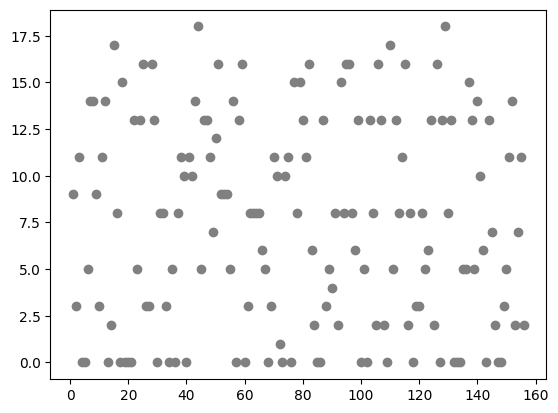

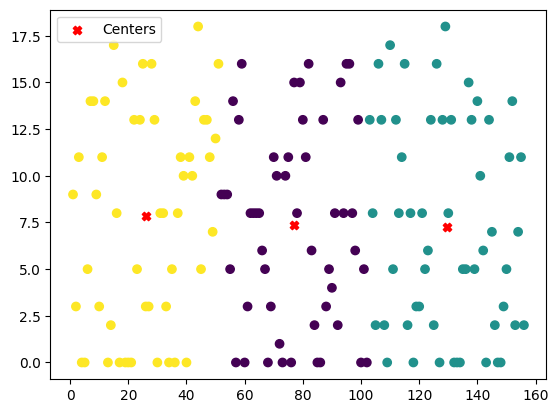

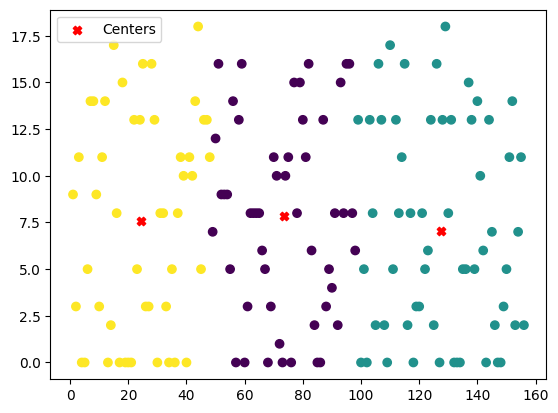

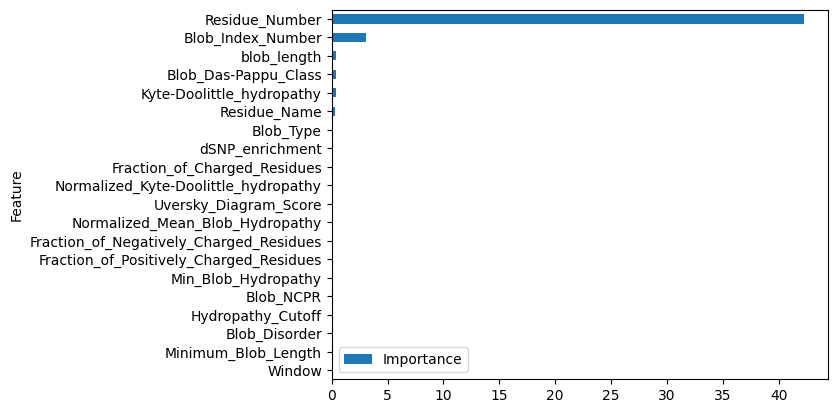

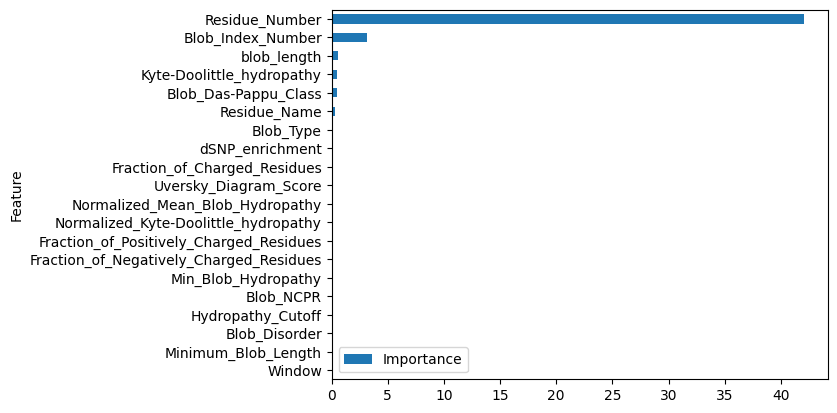

In [17]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder


df = pd.read_csv('blob.csv')
display(df.head())

for col in df.columns:
    if df[col].dtype == object:
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

if 'TrueCluster' in df.columns:
    X = df.drop('TrueCluster', axis=1).values
    y_true = df['TrueCluster'].values
else:
    X = df.values
    y_true = None

if X.shape[1] >= 2:
    plt.scatter(X[:,0], X[:,1], c=y_true if y_true is not None else 'gray', cmap='viridis')
    plt.show()

Kmeans = KMeans(3, random_state=42)
label_Kmeans = Kmeans.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=label_Kmeans, cmap='viridis')
plt.scatter(Kmeans.cluster_centers_[:,0], Kmeans.cluster_centers_[:,1], c='red', marker='X', label='Centers')
plt.legend()
plt.show()

Gaussianmixture = GaussianMixture(3, random_state=42)
label_GaussianMixture = Gaussianmixture.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=label_GaussianMixture, cmap='viridis')
plt.scatter(Gaussianmixture.means_[:,0], Gaussianmixture.means_[:,1], c='red', marker='X', label='Centers')
plt.legend()
plt.show()


features = df.columns.drop('TrueCluster', errors='ignore')

Kmeans_imp = np.std(Kmeans.cluster_centers_, axis=0)
Gaussianmixture_imp = np.std(Gaussianmixture.means_, axis=0)

imp = pd.DataFrame({'Feature': features, 'Importance': Kmeans_imp}).sort_values('Importance')

imp.plot.barh(x='Feature', y='Importance', legend=True)
plt.show()

imp = pd.DataFrame({'Feature': features, 'Importance': Gaussianmixture_imp}).sort_values('Importance')

imp.plot.barh(x='Feature', y='Importance', legend=True)
plt.show()

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sb

from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture
from sklearn.metrics import adjusted_rand_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [ ]:
df = pd.read_csv('blob.csv')
display(df.head())

,Residue_Number,Residue_Name,Window,Hydropathy_Cutoff,Minimum_Blob_Length,blob_length,Normalized_Mean_Blob_Hydropathy,Min_Blob_Hydropathy,Blob_Type,Blob_Index_Number,Blob_Das-Pappu_Class,Blob_NCPR,Fraction_of_Positively_Charged_Residues,Fraction_of_Negatively_Charged_Residues,Fraction_of_Charged_Residues,Uversky_Diagram_Score,dSNP_enrichment,Blob_Disorder,Normalized_Kyte-Doolittle_hydropathy,Kyte-Doolittle_hydropathy
0,1,M,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.711111,1.9
1,2,E,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.111111,-3.5
2,3,P,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.322222,-1.6
3,4,A,3,0.4,4,4,0.461111,0.111111,p,p1,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.700000,1.8
4,5,A,3,0.4,4,6,0.466667,0.111111,h,h1a,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.700000,1.8


,Residue_Number,Residue_Name,Window,Hydropathy_Cutoff,Minimum_Blob_Length,blob_length,Normalized_Mean_Blob_Hydropathy,Min_Blob_Hydropathy,Blob_Type,Blob_Index_Number,Blob_Das-Pappu_Class,Blob_NCPR,Fraction_of_Positively_Charged_Residues,Fraction_of_Negatively_Charged_Residues,Fraction_of_Charged_Residues,Uversky_Diagram_Score,dSNP_enrichment,Blob_Disorder,Normalized_Kyte-Doolittle_hydropathy,Kyte-Doolittle_hydropathy
0,1,9,3,0.4,4,4,0.461111,0.111111,1,10,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.711111,1.9
1,2,3,3,0.4,4,4,0.461111,0.111111,1,10,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.111111,-3.5
2,3,11,3,0.4,4,4,0.461111,0.111111,1,10,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.322222,-1.6
3,4,0,3,0.4,4,4,0.461111,0.111111,1,10,2,-0.250000,0.0,0.250000,0.250000,0.039205,0.00,0.0,0.700000,1.8
4,5,0,3,0.4,4,6,0.466667,0.111111,0,0,1,-0.166667,0.0,0.166667,0.166667,0.005814,0.76,0.0,0.700000,1.8


(156, 20)


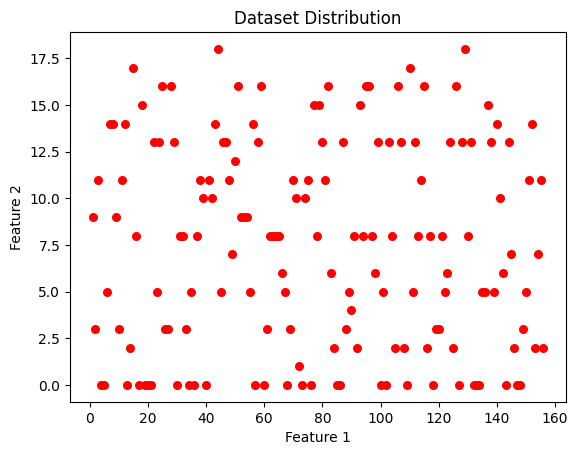

In [ ]:
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

display(df.head())

if 'TrueCluster' in df.columns:
    X = df.drop('TrueCluster', axix=1).values
    y_true = df['TrueCluster'].values
else:
    X = df.values
    y_true = None

print(X.shape)

if X.shape[1] >= 2:
    plt.scatter(X[:,0], X[:,1], c=y_true if y_true is not None else 'red', cmap='viridis' if y_true is not None else None, s=30)
    plt.title("Dataset Distribution")
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.show()

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


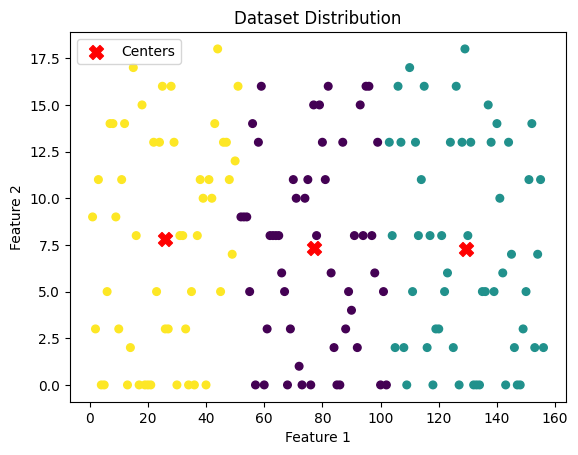

[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1]


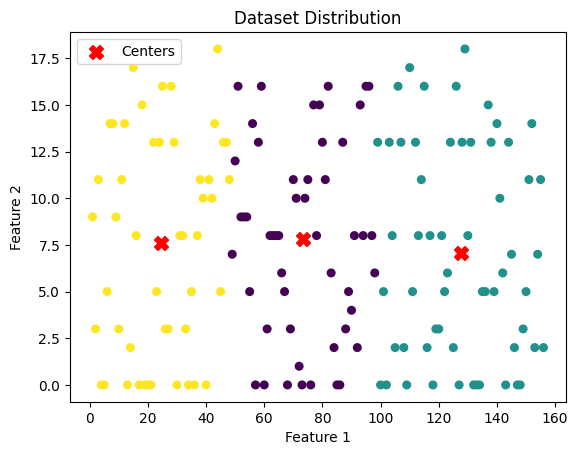

In [ ]:
Kmeans = KMeans(3, random_state=42)
labels_Kmeans = Kmeans.fit_predict(X)
print(labels_Kmeans)

plt.scatter(X[:,0], X[:,1], c=labels_Kmeans, cmap='viridis', s=30)
plt.scatter(Kmeans.cluster_centers_[:, 0], Kmeans.cluster_centers_[:, 1], c='red', marker='X', s=100, label='Centers')
plt.title("Dataset Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

Gaussianmixture = GaussianMixture(3, random_state=42)
labels_Gaussianmixture = Gaussianmixture.fit_predict(X)
print(labels_Gaussianmixture)

plt.scatter(X[:,0], X[:,1], c=labels_Gaussianmixture, cmap='viridis', s=30)
plt.scatter(Gaussianmixture.means_[:, 0], Gaussianmixture.means_[:, 1], c='red', marker='X', s=100, label='Centers')
plt.title("Dataset Distribution")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.show()

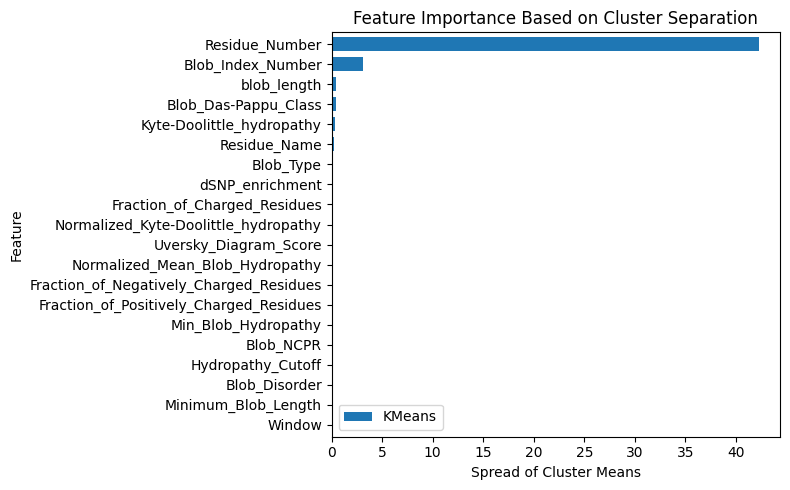

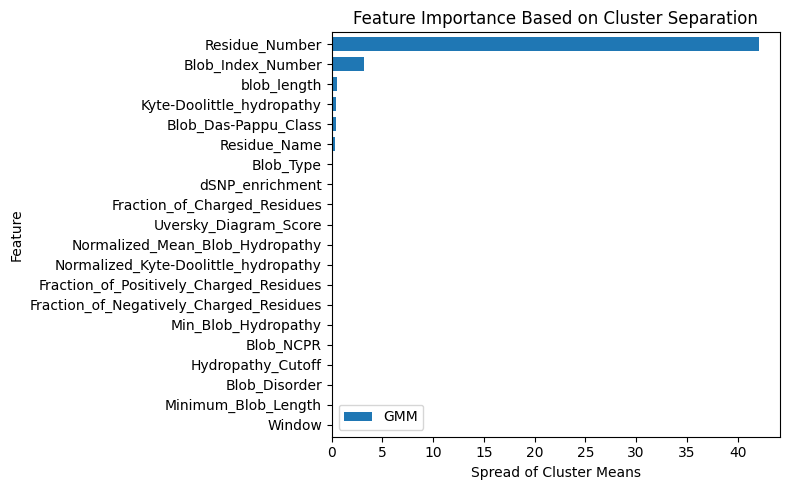

In [ ]:
# Compute feature importances (spread of cluster centers)
features = df.columns.drop('TrueCluster', errors='ignore')

kmeans_imp = np.std(Kmeans.cluster_centers_, axis=0)
gmm_imp = np.std(Gaussianmixture.means_, axis=0)

imp = pd.DataFrame({
    'Feature': features,
    'KMeans': kmeans_imp,
}).sort_values('KMeans')

# Plot
imp.plot(
    x='Feature',
    kind='barh',
    figsize=(8, 5),
    width=0.7,
    title='Feature Importance Based on Cluster Separation',
)
plt.xlabel('Spread of Cluster Means')
plt.tight_layout()
plt.show()


imp = pd.DataFrame({
    'Feature': features,
    'GMM': gmm_imp
}).sort_values('GMM')

# Plot
imp.plot(
    x='Feature',
    kind='barh',
    figsize=(8, 5),
    width=0.7,
    title='Feature Importance Based on Cluster Separation'
)
plt.xlabel('Spread of Cluster Means')
plt.tight_layout()
plt.show()
